### Könyvárak importálása

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
ldir = os.chdir(r'C:\Users\Gergely\Documents\Datasets')

### Dataset betöltése

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [3]:
df.dropna(inplace=True)
df.shape

(392, 9)

### Leíró statisztikák

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Miles_per_Gallon,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Weight_in_lbs,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0


#### Átlagok eredetenként

In [5]:
df.groupby(by='Origin').mean()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Origin,,,,,,
Europe,16.794118,4.161765,109.632353,80.558824,27.602941,2433.470588
Japan,16.172152,4.101266,102.708861,79.835443,30.450633,2221.227848
USA,14.990204,6.277551,247.512245,119.048980,20.033469,3372.489796


#### Szórások eredetenként

In [6]:
df.groupby(by='Origin').std()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs
Origin,,,,,,
Europe,3.087813,0.506975,22.693220,20.157871,6.580182,491.813867
Japan,1.954937,0.590414,23.140126,17.819199,6.090048,320.497248
USA,2.736020,1.655996,98.376347,39.897790,6.440384,795.346690


### Egymintás t-próba

In [20]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(df['Horsepower'], 105)

print('stat=%.3f, p=%.3f' % (stat, pval))
if(pval > 0.05):    # alpha value is 0.05 or 5%
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)

    
#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(df['Horsepower']), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show()

stat=-0.273, p=0.785
H0


### Kétmintás t-próba

In [23]:
from scipy.stats import ttest_ind

stat, pval = ttest_ind(df[df.Origin == 'Japan'].Horsepower, df[df.Origin == 'Europe'].Horsepower,
                       equal_var=True) #Egyenlők-e a szórások

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    

#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(df['Horsepower']), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show()

stat=-0.231, p=0.818
H0


### Dependent T próba (nem normális eloszlás esetén)

In [ ]:
scipy.stats.wilcoxon(df[df.Origin == 'Japan'].Horsepower[:68], df[df.Origin == 'Europe'].Horsepower)

### Levene teszt szórások azonosságára

In [26]:
from scipy.stats import levene

stat, pval = levene(df[df.Origin == 'Japan'].Horsepower, df[df.Origin == 'Europe'].Horsepower)

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    

#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(df['Horsepower']), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show()    

stat=0.097, p=0.756
H0


### ANOVA

In [10]:
from scipy.stats import f_oneway


stat, pval = f_oneway(df[df.Origin == 'Japan'].Horsepower, df[df.Origin == 'Europe'].Horsepower, df[df.Origin == 'USA'].Horsepower)
print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    
    
#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(df['Horsepower']), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show() 

stat=61.342, p=0.000
H1


### Konfidencia intervallum

In [30]:
import math
import scipy.stats as stats

sigma = df[df.Origin == 'Europe'].Horsepower.std()/math.sqrt(392)  # Sample stdev/sample size

a, b = stats.t.interval(0.95,                        # Confidence level
                 df = 391,                     # Degrees of freedom
                 loc = df[df.Origin == 'Europe'].Horsepower.mean(), # Sample mean
                 scale= sigma)

#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'a', 'b']),
                cells=dict(values=[len(df['Horsepower']), a, b]))])

fig.update_layout(width=900, height=230)

fig.show() 

### Normalitás tesztek

#### Random normális eloszlás generálása

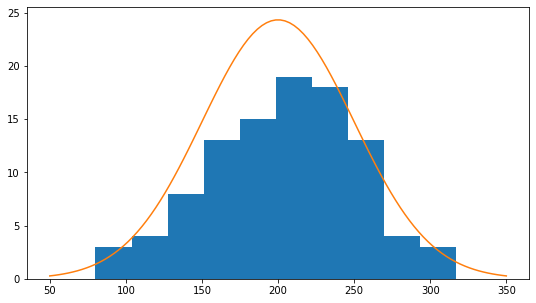

In [12]:
data = np.random.normal(200, 50, 100)

plt.figure(figsize=(9, 5))
plt.hist(data)

#Normál görbe
mu = 200
variance = 2500
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma)*3050)
plt.show()

#### Shapiro-Wilk Test

In [52]:
from scipy.stats import shapiro

stat, pval = shapiro(data)

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    
#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(data), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show() 

stat=0.992, p=0.031
H1


#### D’Agostino’s K^2 Test

In [51]:
from scipy.stats import normaltest

stat, pval = normaltest(data)

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    
#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(data), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show() 

stat=8.211, p=0.016
H1


#### Anderson-Darling Test

In [50]:
from scipy.stats import anderson

result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.838
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


### Kolmogorov-Smirnov (KS) teszt

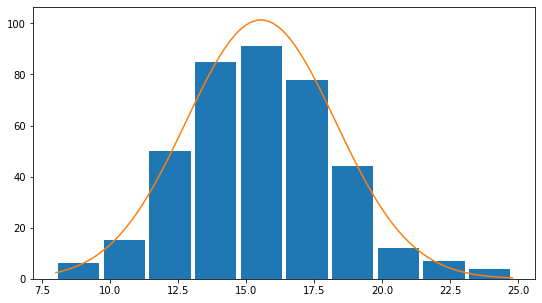

In [48]:
from scipy.stats import norm

#data = df['Acceleration'] #Saját df esetén

loc, scale = norm.fit(data)

# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)
plt.figure(figsize=(9, 5))
plt.hist(data, bins=10, rwidth=0.9)
x = np.arange(np.array(data).min(), np.array(data).max()+0.2, 0.2)
plt.plot(x, 2200*n.pdf(x))
plt.show()

In [49]:
from scipy.stats import kstest

stat, pval = kstest(data, n.cdf)
itelet = ''

print('stat=%.3f, p=%.3f' % (stat, pval))
if pval > 0.05:
    itelet = 'H0'
    print(itelet)
else:
    itelet = 'H1'
    print(itelet)
    
#Táblázat megjelenítése
fig = go.Figure(data=[go.Table(header=dict(values=['n', 'stat', 'p', 'ítélet']),
                cells=dict(values=[len(data), stat, pval, itelet]))])

fig.update_layout(width=900, height=230)

fig.show()

stat=0.051, p=0.247
H0


### Hisztogram - Plotly

In [38]:
fig = px.histogram(x=data)

mu = 200
variance = 2500
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
fig.add_trace(go.Scatter(x=x, y=stats.norm.pdf(x, mu, sigma)*2200, mode='lines'))

fig.show()

### QQ plot

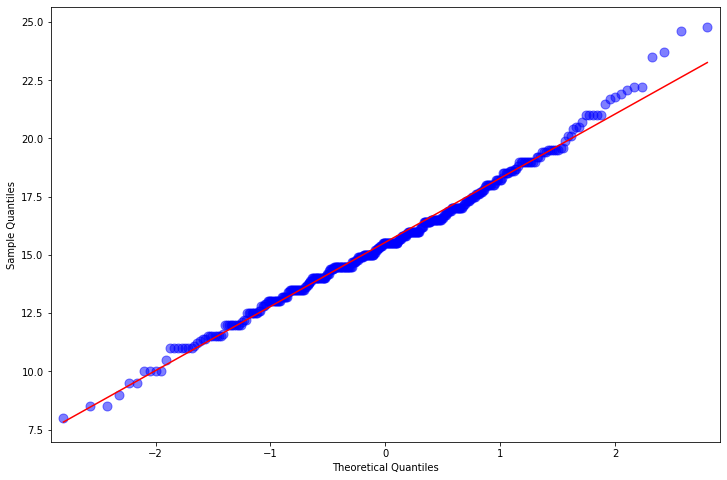

In [53]:
from statsmodels.graphics.gofplots import qqplot

with plt.rc_context():
    plt.rc("figure", figsize=(12, 8))
    qqplot_data = qqplot(data, line='s', alpha=0.5, markersize=9).gca().lines